In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [102]:
df = pd.read_csv("insurance.csv")

In [103]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [104]:
df.shape

(1338, 7)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [106]:
df.describe()    

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


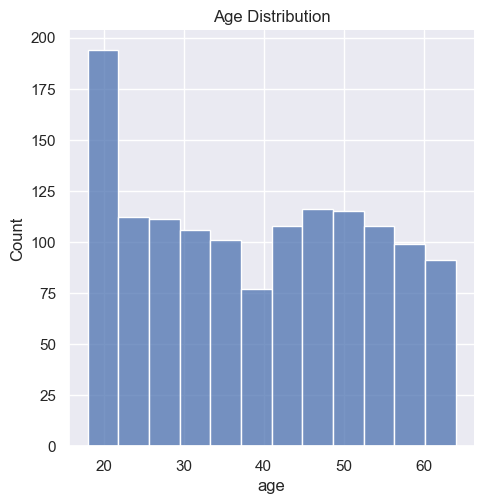

In [107]:
sns.set()
plt.Figure(figsize=(6,6))
sns.displot(df['age'])
plt.title("Age Distribution")
plt.show()

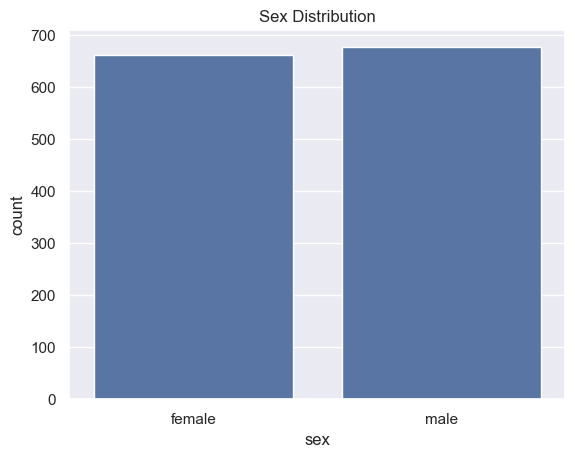

In [108]:
plt.Figure(figsize=(6,6))
sns.countplot(df, x='sex')
plt.title("Sex Distribution")
plt.show()

In [109]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

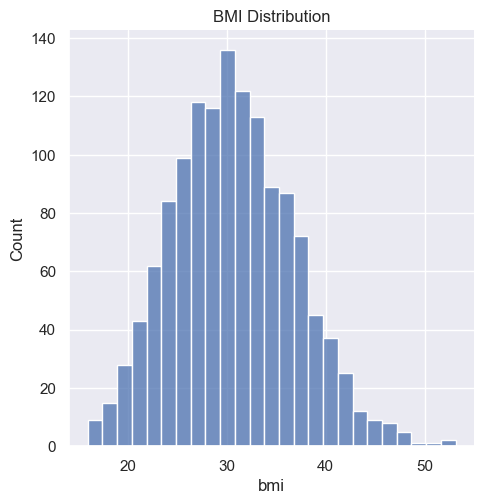

In [110]:
plt.Figure(figsize=(6,6))
sns.displot(df['bmi'])
plt.title("BMI Distribution")
plt.show()

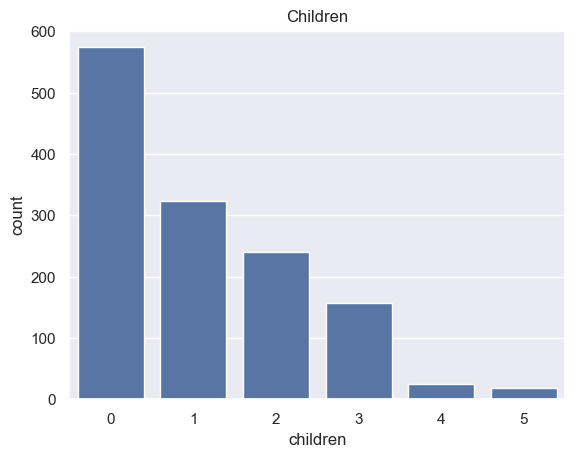

In [111]:
plt.Figure(figsize=(6,6))
sns.countplot(df, x='children')
plt.title('Children')
plt.show()

In [112]:
df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

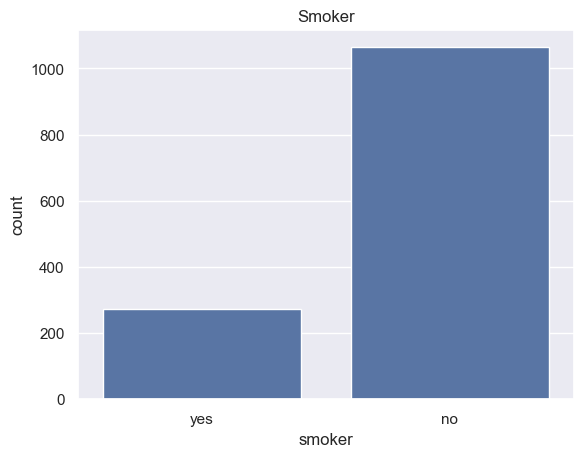

In [113]:
plt.Figure(figsize=(6,6))
sns.countplot(df, x='smoker')
plt.title('Smoker')
plt.show()

In [114]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

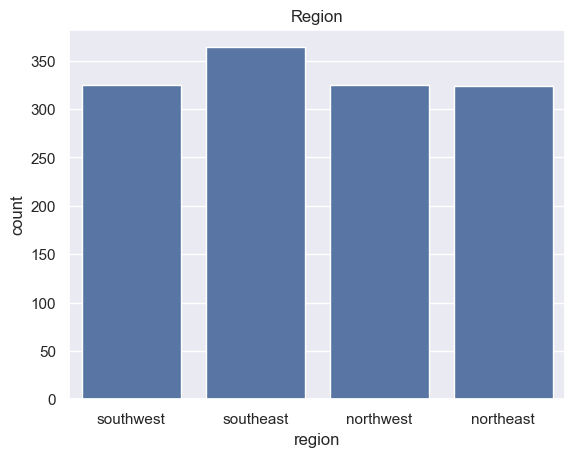

In [115]:
plt.Figure(figsize=(6,6))
sns.countplot(df, x='region')
plt.title('Region')
plt.show()

In [116]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

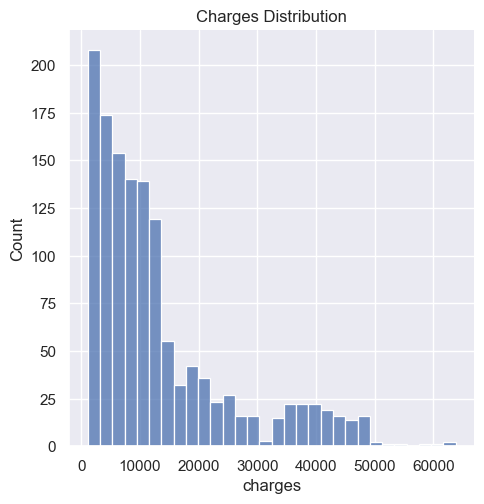

In [117]:
plt.Figure(figsize=(6,6))
sns.displot(df['charges'])
plt.title("Charges Distribution")
plt.show()

In [118]:
df.replace({'sex': {'male': 0, 'female':1}}, inplace=True)
df.replace({'smoker': {'yes': 0, 'no': 1}}, inplace=True)
df.replace({'region': {'southeast': 0, 'southwest': 1, 'northeast': 2, 'northwest': 3}}, inplace=True)

C:\Users\LIONESS\AppData\Local\Temp\ipykernel_19864\3029256401.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'sex': {'male': 0, 'female':1}}, inplace=True)
C:\Users\LIONESS\AppData\Local\Temp\ipykernel_19864\3029256401.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'smoker': {'yes': 0, 'no': 1}}, inplace=True)
C:\Users\LIONESS\AppData\Local\Temp\ipykernel_19864\3029256401.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the ol

In [119]:
X = df.drop(columns='charges', axis=1)
Y = df['charges']

In [120]:
print(X)
print(Y)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [121]:
print(df.isna().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [122]:
print(df.dtypes)

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object


In [123]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [124]:
print(X_train.dtypes)


age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
dtype: object


In [125]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [126]:
regressor = LinearRegression()

In [127]:
regressor.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [128]:
training_data_prediction = regressor.predict(X_train)

In [129]:
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print("R squared value for train data: ", r2_train)

R squared value for train data:  0.751505643411174


In [130]:
test_data_prediction = regressor.predict(X_test)

In [131]:
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print("R squared value for test data: ", r2_test)

R squared value for test data:  0.7447273869684077


In [132]:
input_data = (32, 0, 28.880, 0, 1, 3)

input_data_as_np_array = np.asarray(input_data)
input_data_reshaped = input_data_as_np_array.reshape(1, -1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print("Your medical insurance cost is USD: ", prediction[0])

[5660.26542737]
Your medical insurance cost is USD:  5660.265427371131


c:\Users\LIONESS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
